In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

data = pd.read_csv("../data/rankings.csv")
data.head()

,consensus_ranking,player_name,team_name_abbrev,position,bye_week,best_ranking,worst_ranking,average_ranking,ranking_std,ADP,vs ADP
0,1,Christian McCaffrey,CAR,RB,13.0,1,6,1.3,1.0,1.0,0.0
1,2,Saquon Barkley,NYG,RB,11.0,1,6,2.8,1.1,2.0,0.0
2,3,Michael Thomas,NO,WR,6.0,2,11,3.6,1.5,7.0,4.0
3,4,Ezekiel Elliott,DAL,RB,10.0,2,19,3.9,1.2,3.0,-1.0
4,5,Derrick Henry,TEN,RB,7.0,2,13,5.3,2.2,6.0,1.0


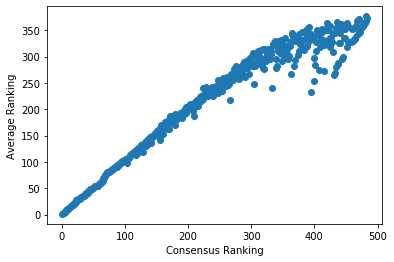

In [28]:
fig, ax = plt.subplots()
ax.scatter(data['consensus_ranking'], data['average_ranking'])
plt.ylabel('Average Ranking')
plt.xlabel('Consensus Ranking')
plt.show()

In [29]:
data_copy = data
y = data_copy['average_ranking']
X = data_copy.drop(['average_ranking'], axis=1)

In [30]:
corr_matrix = data_copy.corr()
corr_matrix['average_ranking'].sort_values(ascending=False)

average_ranking      1.000000
consensus_ranking    0.971868
ADP                  0.971760
worst_ranking        0.930179
best_ranking         0.929508
ranking_std          0.424684
bye_week            -0.016917
vs ADP              -0.166061
Name: average_ranking, dtype: float64

In [37]:
from sklearn.preprocessing import OrdinalEncoder

position_cat = X[['position']]
ordinal_encoder = OrdinalEncoder()
position_encode = ordinal_encoder.fit_transform(position_cat)
X['position'] = position_encode
X.head()

,consensus_ranking,player_name,team_name_abbrev,position,bye_week,best_ranking,worst_ranking,ranking_std,ADP,vs ADP
0,1,Christian McCaffrey,CAR,3.0,13.0,1,6,1.0,1.0,0.0
1,2,Saquon Barkley,NYG,3.0,11.0,1,6,1.1,2.0,0.0
2,3,Michael Thomas,NO,5.0,6.0,2,11,1.5,7.0,4.0
3,4,Ezekiel Elliott,DAL,3.0,10.0,2,19,1.2,3.0,-1.0
4,5,Derrick Henry,TEN,3.0,7.0,2,13,2.2,6.0,1.0


In [48]:
X['bye_week'].fillna(method='ffill')
X['vs ADP'].fillna(method='ffill')
X['ADP'].fillna(method='ffill', inplace=True)

0        1.0
1        2.0
2        7.0
3        3.0
4        6.0
       ...  
478    190.0
479    190.0
480    190.0
481    190.0
482    190.0
Name: ADP, Length: 483, dtype: float64

In [54]:
from sklearn.cluster import KMeans
 
categories = ['position', 'best_ranking', 'worst_ranking', 'ranking_std']
X = X[categories]
k = 14
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

TypeError: scatter() missing 1 required positional argument: 'x'

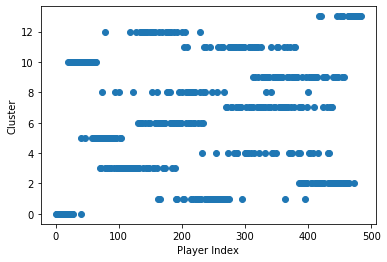

In [67]:
data_copy['cluster'] = y_pred
plt.scatter(data_copy['consensus_ranking'], data_copy['cluster'])
plt.ylabel('Cluster')
plt.xlabel('Player Index')
plt.show()